# Assignment 2

## Angelo Rosace



In [1]:
import pandas as pd
import seaborn as sn
import random as rand
import matplotlib.pyplot as plt 

First of all we will need to read the file containing the result of the experiment

In [2]:
diet_and_atp = pd.read_csv("diet_and_atp.tsv", sep = "\t", header = [0])
diet_and_atp

,Protein,Carbohydrates,Fat,ATP
0,1.95,6.92,0.02,9.44
1,0.64,2.65,0.15,4.04
2,1.82,0.98,0.21,3.72
3,1.80,4.69,0.23,7.54
4,0.93,4.22,0.02,5.70
...,...,...,...,...
94,1.83,5.69,0.15,8.60
95,1.77,6.33,0.07,8.66
96,1.15,4.88,0.27,6.80
97,1.30,3.91,0.03,5.46


Above is the table containing the data that came from the experiment done in the lab.
In order to have a deeper understanding of the data we will plot each of the distributions of the different values.

<function matplotlib.pyplot.show(*args, **kw)>

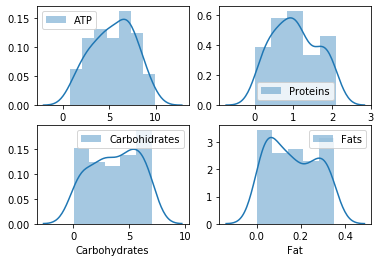

In [3]:
atp = diet_and_atp["ATP"]
prot = diet_and_atp["Protein"]
carb = diet_and_atp["Carbohydrates"]
fat = diet_and_atp["Fat"]

plt.subplot(2,2,1)
sn.distplot(atp, label="ATP")
plt.legend()
plt.subplot(2,2,2)
sn.distplot(prot, label="Proteins")
plt.legend()
plt.subplot(2,2,3)
sn.distplot(carb, label="Carbohidrates")
plt.legend()
plt.subplot(2,2,4)
sn.distplot(fat, label="Fats")
plt.legend()
plt.show

By taking a look to the graphs for all the variables individually we can recognize some sort of normal distribution for all of them.

Besides from the data the experiment tells us also that the model describing our data is defined by this function:
**atp = a * Protein + b * Carbohidrates + c * Fat + ε**

This information plus the information we get by inspecting the data leads us to the next step: 
Implement a Markov Chain Monte Carlo algorithm.

1.0450505050505052 3.707474747474747 0.16313131313131313


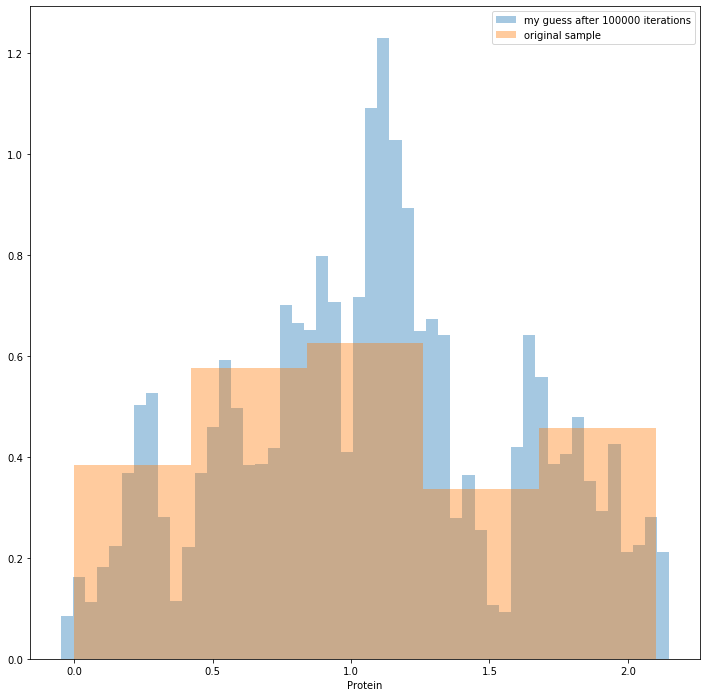

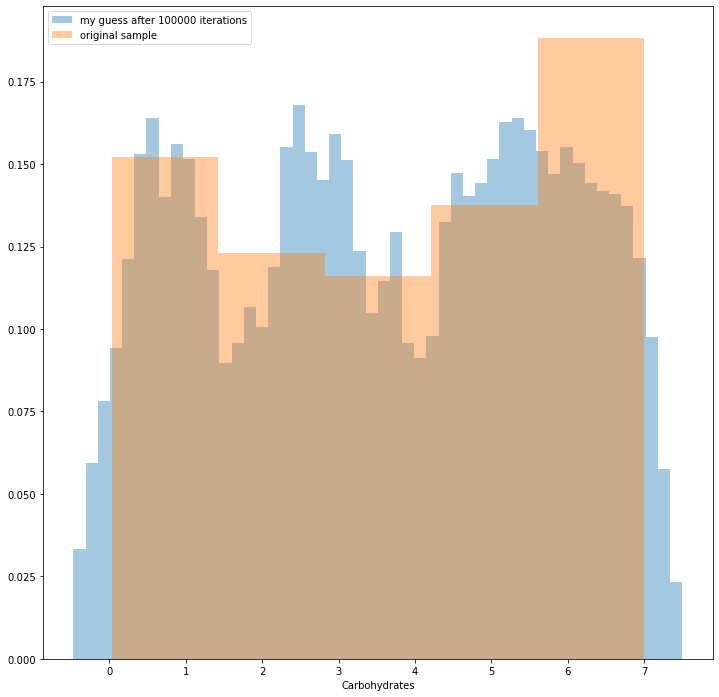

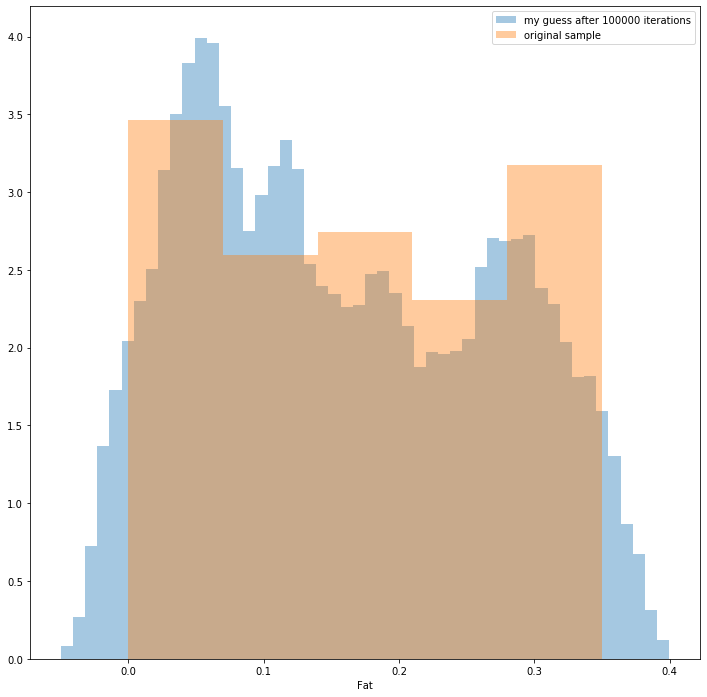

In [4]:
def mean(lst): 
    return sum(lst) / len(lst)

# I want to obtain the posterior distribution of my samples

iterations = 100000
# This are the initial guesses for the mean. They are arbitrary, changing them will affect the execution of the algorithm
current_prot = mean(prot) #- 0.5
current_carb = mean(carb) #- 1
current_fat = mean(fat) #- 0.05

# Record of the steps. It is a list of lists containing a list for each iteration. This lists are made of the values of the three variables explaining the model
all_steps_prot = []
all_steps_carb = []
all_steps_fat = []
# Record of the posterior distribution
all_currents_prot = []
all_currents_carb = []
all_currents_fat = []

for i in range(iterations):
    # Move randomly, forward or backwards, at a maximun distance of 0.5 in each direction, that is on the surfaces explained by the three variables
    # The different distances for the different variables are due to the scale of each one of them, the larger the scale the longer the distance.
    step_prot = (rand.random()/10) - 0.05
    step_carb = rand.random() - 0.5
    step_fat = (rand.random()/10)-0.05
    # The step that I will decide if I accept it or not
    candidate_current_prot = current_prot + step_prot
    candidate_current_carb = current_carb + step_carb
    candidate_current_fat = current_fat + step_fat
    
    p_actual_step_prot = len([sample for sample in prot if current_prot - 0.05 < sample and sample < current_prot + 0.05]) / float(len(prot))
    p_candidate_step_prot = len([sample for sample in prot if candidate_current_prot - 0.05 < sample and sample < candidate_current_prot + 0.05]) / float(len(prot))
    
    p_actual_step_carb = len([sample for sample in carb if current_carb - 0.5 < sample and sample < current_carb + 0.5]) / float(len(carb))
    p_candidate_step_carb = len([sample for sample in carb if candidate_current_carb - 0.5 < sample and sample < candidate_current_carb + 0.5]) / float(len(carb))
    
    p_actual_step_fat = len([sample for sample in fat if current_fat - 0.05 < sample and sample < current_fat + 0.05]) / float(len(fat))
    p_candidate_step_fat = len([sample for sample in fat if candidate_current_fat - 0.05 < sample and sample < candidate_current_fat + 0.05]) / float(len(fat))
    
    
    # If the new step is better, I always accept
    # If not, I accept it randomly
    if p_candidate_step_prot > p_actual_step_prot:
        current_prot = candidate_current_prot
    else:
        random_number = rand.random()
        if random_number <= p_candidate_step_prot / p_actual_step_prot:
            current_prot = candidate_current_prot
    
    if p_candidate_step_carb > p_actual_step_carb:
        current_carb = candidate_current_carb
    else:
        random_number = rand.random()
        if random_number <= p_candidate_step_carb / p_actual_step_carb:
            current_carb = candidate_current_carb
            
    if p_candidate_step_fat > p_actual_step_fat:
        current_fat = candidate_current_fat
    else:
        random_number = rand.random()
        if random_number <= p_candidate_step_fat / p_actual_step_fat:
            current_fat = candidate_current_fat
    
    
    # I record my step and where I'm standing
    all_currents_prot.append(current_prot)
    all_currents_carb.append(current_carb)
    all_currents_fat.append(current_fat)
    all_steps_prot.append(step_prot)
    all_steps_carb.append(step_carb)
    all_steps_fat.append(step_fat)
    
    

# If I plot all my standings, I will have the likelihood function of the mean of the data 
# (the parameter of the model that I'm inferring)
fig=plt.figure(figsize=(12, 12))
sn.distplot(all_currents_prot, kde=False, label="my guess after %s iterations" % iterations, norm_hist=True)
# And I compare them with the original samples
sn.distplot(prot, kde=False, label="original sample", norm_hist=True)
plt.legend()

fig2=plt.figure(figsize=(12, 12))
sn.distplot(all_currents_carb, kde=False, label="my guess after %s iterations" % iterations, norm_hist=True)
sn.distplot(carb, kde=False, label="original sample", norm_hist=True)
plt.legend()

fig3=plt.figure(figsize=(12, 12))
sn.distplot(all_currents_fat, kde=False, label="my guess after %s iterations" % iterations, norm_hist=True)
sn.distplot(fat, kde=False, label="original sample", norm_hist=True)
plt.legend()

In [5]:
prot_coeficient = mean(all_currents_prot)
carb_coeficient = mean(all_currents_carb)
fat_coeficient = mean(all_currents_fat)

print("The inferred coeficient for the protein variable of the model is:", prot_coeficient)
print("The inferred coeficient for the carbohidrate variable of the model is:", carb_coeficient)
print("The inferred coeficient for the fat variable of the model is:", fat_coeficient)

The inferred coeficient for the protein variable of the model is: 1.0745719533551172
The inferred coeficient for the carbohidrate variable of the model is: 3.5918949442375574
The inferred coeficient for the fat variable of the model is: 0.1593900763587109
